In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sklearn.cluster
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import seaborn as sns

In [5]:
df_trained=pd.read_csv(r'C:\Users\zsoltani\Desktop\Zohreh Training and Personal files\Python class\Chapter 7\train.csv\\train.csv')
df_trained.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [6]:
df_trained.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


In [7]:
# count Columns and Rows of our DataFrame
df_trained.shape

(878049, 9)

In [8]:
df_test=pd.read_csv(r'C:\Users\zsoltani\Desktop\Zohreh Training and Personal files\Python class\Chapter 7\test.csv\\test.csv')
df_test.head()


,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [9]:
df_test.describe()

,Id,X,Y
count,884262.000000,884262.000000,884262.000000
mean,442130.500000,-122.422693,37.771476
std,255264.596206,0.030985,0.484824
min,0.000000,-122.513642,37.707879
25%,221065.250000,-122.433069,37.752374
50%,442130.500000,-122.416517,37.775421
75%,663195.750000,-122.406959,37.784353
max,884261.000000,-120.500000,90.000000


In [10]:
df_test.shape

(884262, 7)

In [11]:
#Trained data type
df_trained.dtypes

Dates          object
Category       object
Descript       object
DayOfWeek      object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
dtype: object

In [12]:
df_test.dtypes

Id              int64
Dates          object
DayOfWeek      object
PdDistrict     object
Address        object
X             float64
Y             float64
dtype: object

In [13]:
#Check the pct of the missing data

nas=pd.DataFrame(df_trained.isnull().sum().sort_values(ascending=False)/len(df_trained),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]
# Based on the analysis above it apprears there is no null data in the data frame

,percent


In [14]:
# Applying aggregation across all the columns  
# mxc and min will be found for eachnumeric type column in df_trained dataframe 
  
df_trained.aggregate(['min', 'max']) 

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
min,2003-01-06 00:01:00,ARSON,ABANDONMENT OF CHILD,Friday,BAYVIEW,"ARREST, BOOKED",0 Block of HARRISON ST,-122.513642,37.707879
max,2015-05-13 23:53:00,WEAPON LAWS,YOUTH COURT,Wednesday,TENDERLOIN,UNFOUNDED,ZOE ST / WELSH ST,-120.500000,90.000000


In [15]:
  
df_test.aggregate(['min', 'max']) 

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
min,0,2003-01-01 00:01:00,Friday,BAYVIEW,0 Block of 10TH ST,-122.513642,37.707879
max,884261,2015-05-10 23:59:00,Wednesday,TENDERLOIN,ZOE ST / WELSH ST,-120.500000,90.000000


In [16]:
#transfprming the target variable
tarvar=df_trained['Category'].unique()
print (tarvar)


['WARRANTS' 'OTHER OFFENSES' 'LARCENY/THEFT' 'VEHICLE THEFT' 'VANDALISM'
 'NON-CRIMINAL' 'ROBBERY' 'ASSAULT' 'WEAPON LAWS' 'BURGLARY'
 'SUSPICIOUS OCC' 'DRUNKENNESS' 'FORGERY/COUNTERFEITING' 'DRUG/NARCOTIC'
 'STOLEN PROPERTY' 'SECONDARY CODES' 'TRESPASS' 'MISSING PERSON' 'FRAUD'
 'KIDNAPPING' 'RUNAWAY' 'DRIVING UNDER THE INFLUENCE'
 'SEX OFFENSES FORCIBLE' 'PROSTITUTION' 'DISORDERLY CONDUCT' 'ARSON'
 'FAMILY OFFENSES' 'LIQUOR LAWS' 'BRIBERY' 'EMBEZZLEMENT' 'SUICIDE'
 'LOITERING' 'SEX OFFENSES NON FORCIBLE' 'EXTORTION' 'GAMBLING'
 'BAD CHECKS' 'TREA' 'RECOVERED VEHICLE' 'PORNOGRAPHY/OBSCENE MAT']


In [17]:
CatRep={}
count=1
for data in tarvar:
    CatRep[data]=count
    count+=1

df_trained['Category']=df_trained['Category'].replace(CatRep)


In [18]:
df_trained.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,1,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,2,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,2,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,3,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,3,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [19]:
WdayRepl = {
    "Monday": 1,
    "Tuesday":2,
    "Wednesday":3,
    "Thursday":4,
    "Friday":5,
    "Saturday":6,
    "Sunday":7
}
df_trained['DayOfWeek'] =df_trained['DayOfWeek'].replace(WdayRepl)
df_test['DayOfWeek'] =df_test['DayOfWeek'].replace(WdayRepl)

In [20]:
df_trained.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,1,WARRANT ARREST,3,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,2,TRAFFIC VIOLATION ARREST,3,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,2,TRAFFIC VIOLATION ARREST,3,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,3,GRAND THEFT FROM LOCKED AUTO,3,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,3,GRAND THEFT FROM LOCKED AUTO,3,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [21]:
df_test.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,7,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,7,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,7,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,7,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,7,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [22]:
DistList=df_test['PdDistrict'].unique()
print(DistList)

count=1
DisList_test={}
for data in DistList:
    DisList_test[data]=count
    count+=1

df_test['PdDistrict'] =df_test['PdDistrict'].replace(DisList_test)
df_trained['PdDistrict'] =df_trained['PdDistrict'].replace(DisList_test)

['BAYVIEW' 'NORTHERN' 'INGLESIDE' 'TARAVAL' 'MISSION' 'CENTRAL'
 'TENDERLOIN' 'RICHMOND' 'SOUTHERN' 'PARK']


In [23]:
df_trained.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,1,WARRANT ARREST,3,2,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,2,TRAFFIC VIOLATION ARREST,3,2,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,2,TRAFFIC VIOLATION ARREST,3,2,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,3,GRAND THEFT FROM LOCKED AUTO,3,2,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,3,GRAND THEFT FROM LOCKED AUTO,3,10,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [24]:
df_test.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,7,1,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,7,1,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,7,2,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,7,3,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,7,3,4700 Block of MISSION ST,-122.437394,37.721412


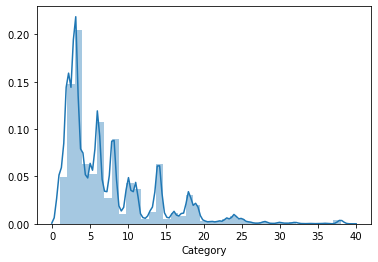

In [25]:
#EDA analysis

_=sns.distplot(df_trained['Category'], bins=39)

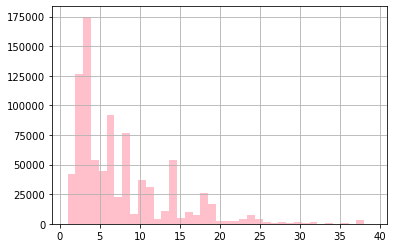

In [26]:
df_trained['Category'].hist(bins=39, color='pink')

In [27]:
df_trained['Category'].value_counts()

3     174900
2     126182
6      92304
8      76876
14     53971
4      53781
5      44725
1      42214
10     36755
11     31414
18     25989
7      23000
19     16679
13     10609
16      9985
9       8555
24      7484
17      7326
15      4540
23      4388
25      4320
12      4280
38      3138
20      2341
22      2268
21      1946
28      1903
26      1513
32      1225
30      1166
31       508
27       491
36       406
29       289
34       256
33       148
35       146
39        22
37         6
Name: Category, dtype: int64

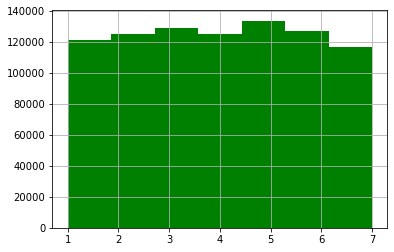

In [28]:
df_trained['DayOfWeek'].hist(bins=7,color='green')

In [29]:
df_trained['DayOfWeek'].value_counts()

5    133734
3    129211
6    126810
4    125038
2    124965
1    121584
7    116707
Name: DayOfWeek, dtype: int64

In [30]:
#Correlation heatmap
corr = df_trained.corr()
corr.round(4).style.background_gradient(cmap='coolwarm')

,Category,DayOfWeek,PdDistrict,X,Y
Category,1.000000,-0.016300,-0.016100,0.000100,-0.005300
DayOfWeek,-0.016300,1.000000,0.003000,0.006000,-0.000900
PdDistrict,-0.016100,0.003000,1.000000,-0.038500,0.024400
X,0.000100,0.006000,-0.038500,1.000000,0.559300
Y,-0.005300,-0.000900,0.024400,0.559300,1.000000


In [31]:
df_trained.dtypes

Dates          object
Category        int64
Descript       object
DayOfWeek       int64
PdDistrict      int64
Resolution     object
Address        object
X             float64
Y             float64
dtype: object

In [32]:
#Calculating Skew for the target :
skew = df_trained.skew()
print(skew)

Category        1.662607
DayOfWeek      -0.005572
PdDistrict     -0.002146
X              18.685494
Y             113.984988
dtype: float64


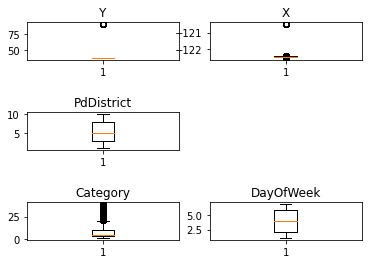

In [61]:
# assessing the Ouliers

plt.subplot(5,2,1)
_=plt.boxplot(df_trained['Y'])
_=plt.title('Y')
plt.subplot(5,2,2)
_=plt.boxplot(df_trained['X'])
_=plt.title('X')
plt.subplot(5,2,9)
_=plt.boxplot(df_trained['Category'])
_=plt.title('Category')
plt.subplot(5,2,10)
_=plt.boxplot(df_trained['DayOfWeek'])
_=plt.title('DayOfWeek')
plt.subplot(5,2,5)
_=plt.boxplot(df_trained['PdDistrict'])
_=plt.title('PdDistrict')

In [34]:

x = df_trained.drop(['Dates','Resolution','Descript','Address'], axis =1).values
df_trained.head()
print (x)

[[   1.            3.            2.         -122.42589168   37.7745986 ]
 [   2.            3.            2.         -122.42589168   37.7745986 ]
 [   2.            3.            2.         -122.42436302   37.80041432]
 ...
 [   3.            1.            9.         -122.40339036   37.78026558]
 [   5.            1.            9.         -122.3905314    37.78060708]
 [  13.            1.            1.         -122.39492572   37.73821154]]


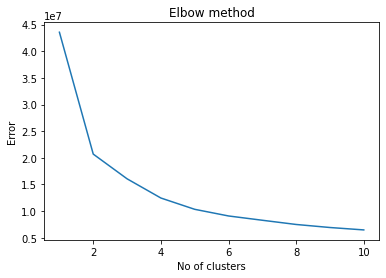

In [35]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [36]:

features = ["DayOfWeek", "PdDistrict",  "X", "Y"]
X_train = df_trained[features]
y_train = df_trained["Category"]
X_test = df_test[features]
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=5)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scoresmean:{}'.format(np.mean(cv_scores)))

[0.20773304 0.20544958 0.20756791 0.20788679 0.19770057]
cv_scoresmean:0.20526757895401565


In [44]:
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 3 
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=3)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scoresmean:{}'.format(np.mean(cv_scores)))

[0.19191754 0.19562462 0.18666612]
cv_scoresmean:0.19140275770486612


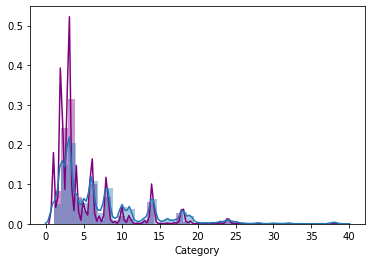

In [45]:
# k=5 selected ; Df=Train; df_test=Test
#from sklearn.neighbors import KNeighborsClassifier|already uploaded
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
_=sns.distplot(predictions, bins=39, color='purple')

_=sns.distplot(df_trained['Category'], bins=39)

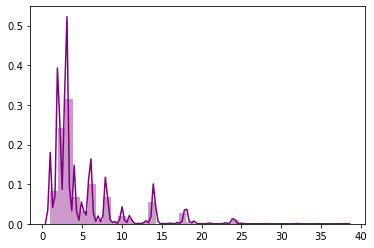

In [46]:
_=sns.distplot(predictions, bins=39, color='purple')


In [47]:
pd.value_counts(predictions)

3     263506
2     202194
6      85197
1      68474
8      56196
4      55788
14     45250
5      26895
18     22286
10     16967
11      9627
7       8042
24      7449
13      3406
19      3024
9       2933
17      1333
23      1110
21       941
16       729
25       706
12       498
32       396
15       334
28       234
38       209
20       182
22       147
27       102
26        74
31        18
35         9
36         4
30         2
dtype: int64

In [48]:
from collections import OrderedDict
CatRep_new = OrderedDict(sorted(CatRep.items()))
print(CatRep_new)

OrderedDict([('ARSON', 26), ('ASSAULT', 8), ('BAD CHECKS', 36), ('BRIBERY', 29), ('BURGLARY', 10), ('DISORDERLY CONDUCT', 25), ('DRIVING UNDER THE INFLUENCE', 22), ('DRUG/NARCOTIC', 14), ('DRUNKENNESS', 12), ('EMBEZZLEMENT', 30), ('EXTORTION', 34), ('FAMILY OFFENSES', 27), ('FORGERY/COUNTERFEITING', 13), ('FRAUD', 19), ('GAMBLING', 35), ('KIDNAPPING', 20), ('LARCENY/THEFT', 3), ('LIQUOR LAWS', 28), ('LOITERING', 32), ('MISSING PERSON', 18), ('NON-CRIMINAL', 6), ('OTHER OFFENSES', 2), ('PORNOGRAPHY/OBSCENE MAT', 39), ('PROSTITUTION', 24), ('RECOVERED VEHICLE', 38), ('ROBBERY', 7), ('RUNAWAY', 21), ('SECONDARY CODES', 16), ('SEX OFFENSES FORCIBLE', 23), ('SEX OFFENSES NON FORCIBLE', 33), ('STOLEN PROPERTY', 15), ('SUICIDE', 31), ('SUSPICIOUS OCC', 11), ('TREA', 37), ('TRESPASS', 17), ('VANDALISM', 5), ('VEHICLE THEFT', 4), ('WARRANTS', 1), ('WEAPON LAWS', 9)])


In [56]:
for element in CatRep_new.keys():
    if CatRep_new[element] == 3:
        print(element)

LARCENY/THEFT
